## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

     Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]
['I. setosa' 'I. versicolor' 'I. virginica']


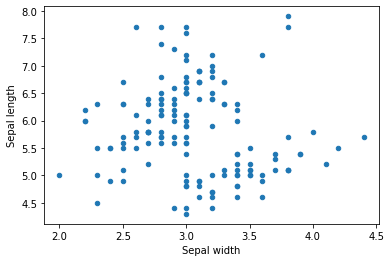

In [60]:
import pandas as pd
from itertools import cycle
data = pd.read_csv("../../data/iris_data.csv", decimal=',')
data = data.drop(["Petal width", "Petal length"], axis=1)
print(data)
print(data['Species'].unique())
colors = cycle('bgrcmy')
data.plot.scatter(x='Sepal width', y = 'Sepal length')


In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth
def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters
